Force experienced by a magnetic bead in an external non-homogenous B. Here, we focus on 2D problem since microscope FoV limits observations to 2D projections.

$
\begin{align}
F_{bead} &= V \cdot M(B) \cdot \nabla B(x,y)
\end{align}
$

M - Magnetization of the bead (A/m), V - volume of the bead ($m^3$), and $\nabla$ B - magnetic field gradient. 

B depends on directly on i linearly or non-linearly depending on the core properties. Constant core permeability gives linear dependence between B and i$_input$ whereas B-H based core permeability suggests non-linear dependence which saturates at certain input current levels.

B is simulated using Comsol and Gaussian current loop technique. From Comsol: \textbf{B}(x,y,i = 0.5 A) and direction angle $\alpha$. From this $\nabla B_x$ and $\nabla B_y$ were derived and sampled based on {x,y} coordinates in the calculations. The spatial density of the simulation was 0.05mm ( $\partial x = \partial y = 5 \cdot 10^{-5}$)

$
\begin{align}
B_x &= B \cos( \alpha ) \\
B_y &= B \sin( \alpha ) \\
\nabla B &= [\frac{ \partial |B|}{\partial x}, \frac{ \partial |B|}{\partial y} ]
\end{align}
$

M(B) can be derived from magnetization measurements which give magnetic moment ($m$) as a function of magnetic field intensity ($H$). Here, we calculate both mass and volumetric magnetization. Mass magnetization is used to compare with tds and volumetric in calculations.

$
\begin{align}
M_{\text{mass}} &= \frac{m}{mass} \\
M_{\text{volumetric}} &= \frac{m}{V}
\end{align}
$

A displacement model for a magnetic bead was used to simulate the bead dispalcement in the field. Both x and y coordinates were managed independently.

k - number of timestep
dt - length of timestep
$\rho$ - density
s$_{k, \text{bead}}$ - bead position
v$_{k, \text{bead}}$ - bead velocity
a$_{k, \text{bead}}$ - bead acceleration

$
\begin{align}
f_{\text{bead}} &= mass \cdot a \rightarrow a = \frac{f_{\text{bead}}}{mass} = \frac{f_{\text{bead}}}{\rho \cdot V_{\text{bead}}} \\
s_{k, \text{bead}}  &= s_{k-1, \text{bead}} + v_{k-1, \text{bead}}*dt + \frac{f}{m}*dt^2 \\
v_{k, \text{bead}} &= v_{k-1, \text{bead}} + \frac{f}{m}*dt \\
\end{align}
$


Mechanocal pareameters were derived from simulated and experimental displacement data using 1) classical micromechnical models 1.0) without B adjustment and 1.1) with B adjustment. Without B adjustment moving bead do not experience constant magnetic gradient since nonhomogenous B. Here, assumptions of constant force in previous studies are evaluated.

Creep:

kelvin-Voigt model and burger model:

$
\begin{align}
\epsilon_{\text{Kelvin-Voigt}} (t) &= \frac{1}{E}*(1-e^{\frac{-E t}{n}}) \\
\epsilon_{\text{Burger's}} (t) &= \sigma \left( \frac{1}{E_1} + \frac{t}{n_1} + \frac{1}{E_2} (1 - e^{ \frac{-E_2 t}{n_2}}) \right)
\end{align}
$

Relaxation:

maxwell model and burger model:

$
\begin{align}
\epsilon_{\text{Kelvin-Voigt}} (t) &= E e^{ \frac{- E t}{n}} \\
\epsilon_{\text{Burger's}} (t) &= 
\end{align}
$

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import _pickle as cPickle

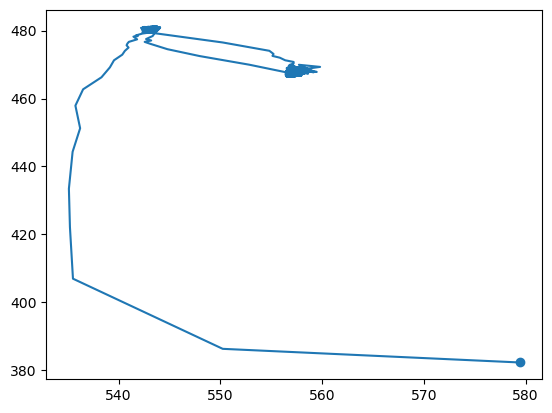

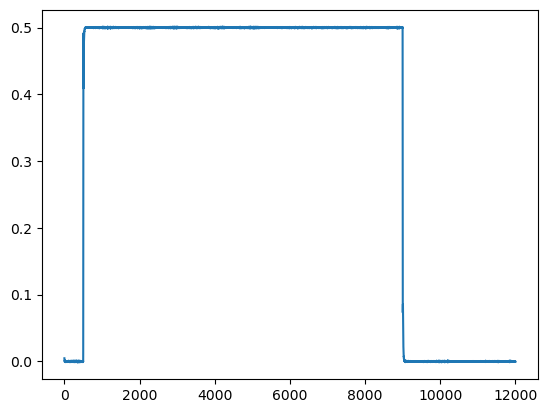

In [24]:
path_track = "./demoData/Tracking/trackingData_2024-01-31.pickle"

with open(path_track, "rb") as input_file:
    file_track = cPickle.load(input_file)

df_track = pd.DataFrame.from_dict(file_track)

plt.plot(df_track["x"],df_track["y"])
plt.scatter(df_track["x"].values[0],df_track["y"].values[0])

plt.show()


#Load calibration
path = "./demoData/Tracking/driver_2024-01-31.npy"
df = pd.DataFrame(np.load(path).T, columns = ['index','aim','measured','Mg', 'scaler'])
plt.plot(df["measured"])

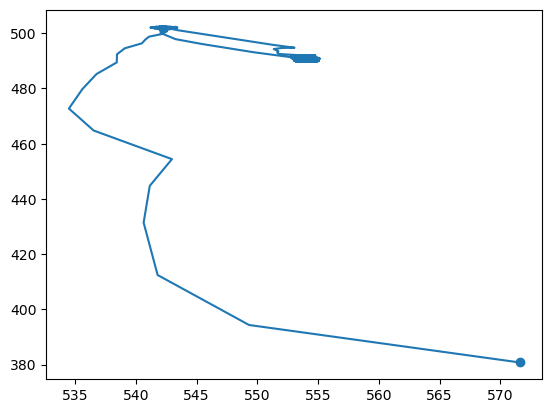

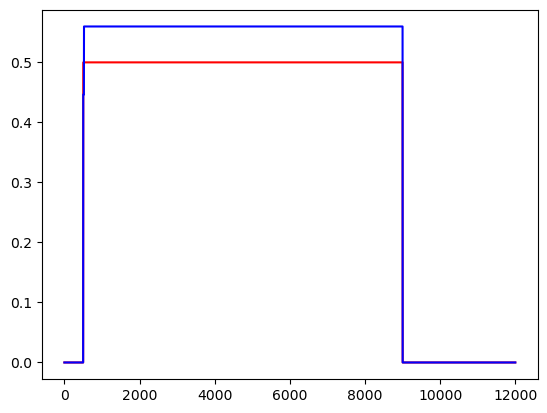

In [29]:
path_track = "./demoData/positionScaling/trackingData_2024-01-31.pickle"

with open(path_track, "rb") as input_file:
    file_track = cPickle.load(input_file)

df_track = pd.DataFrame.from_dict(file_track)

plt.plot(df_track["x"],df_track["y"])
plt.scatter(df_track["x"].values[0],df_track["y"].values[0])

plt.show()


#Load calibration
path = "./demoData/positionScaling/driver_2024-01-31.npy"
df = pd.DataFrame(np.load(path).T, columns = ['index','aim','measured','Mg', 'scaler'])
plt.plot(df["aim"], color = "red")
plt.plot(df["aim"] - df["aim"]*df["scaler"], color = "blue")

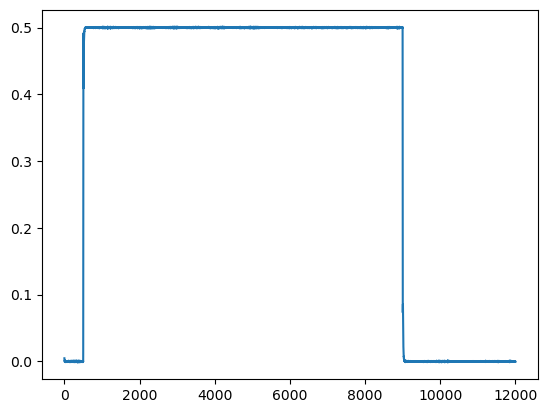

In [17]:

#Load calibration
path = "./demoData/Tracking/driver_2024-01-31.npy"
df = pd.DataFrame(np.load(path).T, columns = ['index','aim','measured','Mg', 'scaler'])
plt.plot(df["measured"])

In [21]:
np.load(path_current)

array([0])

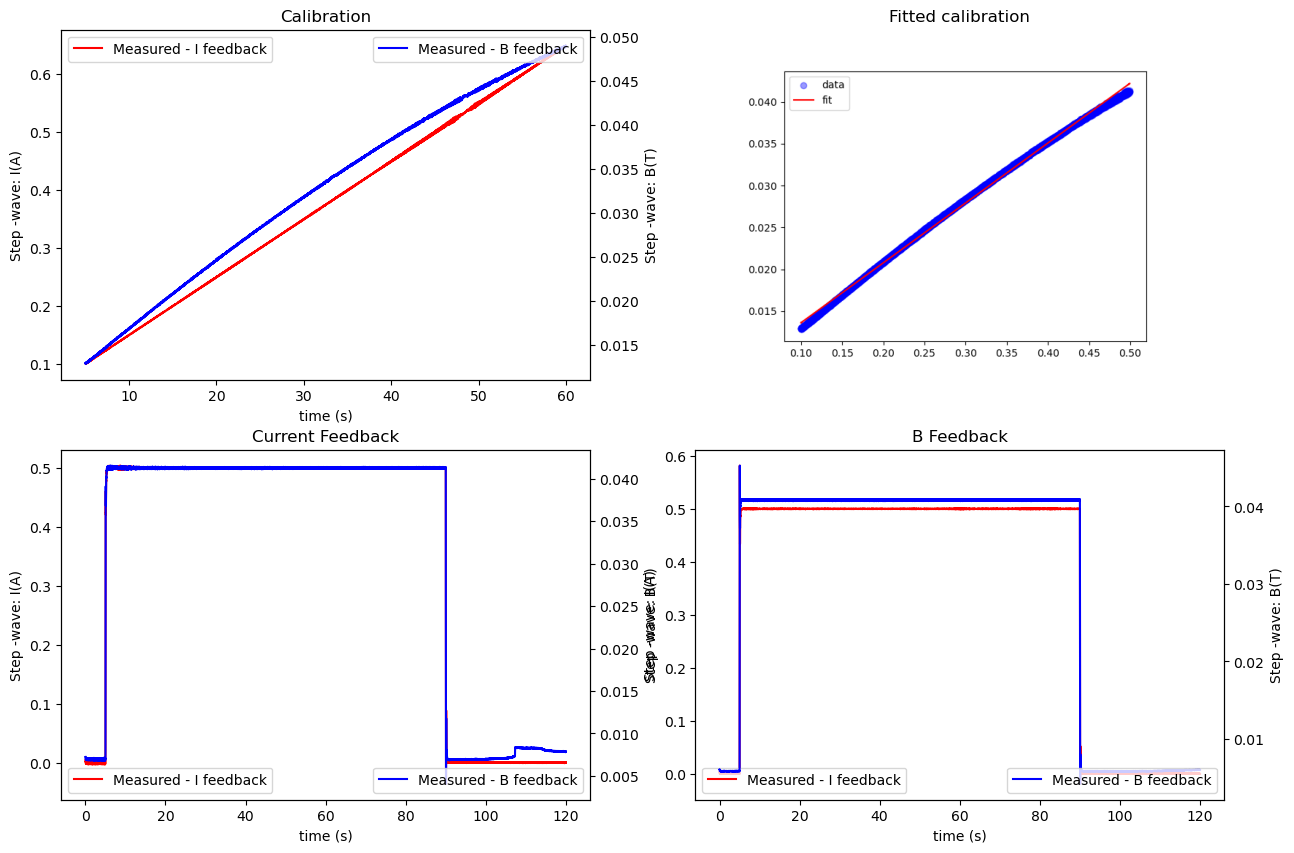

In [33]:
fig, ax  = plt.subplots(2, 2, figsize = (15,10))

#Load calibration
path_calib = "./demoData/calibration/calib_2024-01-31.npy"
df_calib = pd.DataFrame(np.load(path_calib).T, columns = ['index','aim','measured','Mg', 'scaler'])

start = 500
end = 6000
ax[0,0].set_title("Calibration")
ax1 = ax[0,0].twinx()

ax[0,0].plot(df_calib["index"][start:end],df_calib["measured"][start:end], color = "red", label = "Measured - I feedback")
ax1.plot(df_calib["index"][start:end],df_calib["Mg"][start:end], color = "blue", label = "Measured - B feedback")

ax[0,0].set_ylabel("Step -wave: I(A)")
ax[0,0].set_xlabel("time (s)")
ax1.set_ylabel("Step -wave: B(T)")

ax[0,0].legend(loc = "upper left")
ax1.legend(loc = "upper right")

#Calibration fit
ax[0,1].set_title("Fitted calibration")
img = cv2.imread("./demoData/calibration/calib_2024-01-31.png")
ax[0,1].imshow(img)
ax[0,1].axis("off")

#Load current feedback
path_current = "./demoData/currentFeedback/driver_2024-01-31.npy"
df_current = pd.DataFrame(np.load(path_current).T, columns = ['index','aim','measured','Mg', 'scaler'])

ax[1,0].set_title("Current Feedback")
ax2 = ax[1,0].twinx()

ax[1,0].plot(df_current["index"],df_current["measured"], color = "red", label = "Measured - I feedback")
ax2.plot(df_current["index"],df_current["Mg"], color = "blue", label = "Measured - B feedback")

ax[1,0].set_ylabel("Step -wave: I(A)")
ax[1,0].set_xlabel("time (s)")
ax2.set_ylabel("Step -wave: B(T)")

ax[1,0].legend(loc = "lower left")
ax2.legend(loc = "lower right")

#Load current feedback
path_B = "./demoData/BFeedback/driver_2024-01-31.npy"
df_B = pd.DataFrame(np.load(path_B).T, columns = ['index','aim','measured','Mg', 'scaler'])

ax[1,1].set_title("B Feedback")
ax3 = ax[1,1].twinx()

ax[1,1].plot(df_B["index"],df_B["measured"], color = "red", label = "Measured - I feedback")
ax3.plot(df_B["index"],df_B["Mg"], color = "blue", label = "Measured - B feedback")

ax[1,1].set_ylabel("Step -wave: I(A)")
ax[1,1].set_xlabel("time (s)")
ax3.set_ylabel("Step -wave: B(T)")

ax[1,1].legend(loc = "lower left")
ax3.legend(loc = "lower right")

